In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset-uci/HeartDiseaseTrain-Test.csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load the dataset
data = pd.read_csv("/kaggle/input/heart-disease-dataset-uci/HeartDiseaseTrain-Test.csv")

In [13]:
# Data Cleaning
# Handling categorical variables
le = LabelEncoder()
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                   'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [14]:
# Checking for missing values
data.replace('?', np.nan, inplace=True)
data.fillna(data.median(), inplace=True)

# Convert target: 0 = no disease, 1 = disease
data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)

In [15]:
# Exploratory Data Analysis
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())
print("\nSummary Statistics:\n", data.describe())

Dataset Shape: (1025, 14)

First 5 Rows:
    age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1         2             168                        0   
1                    0         1             155                        1   
2                    1         2             125                        1   
3                    1         2             161                        0   
4                    0         2             106                        0   

   oldpeak  slope  vessels_colored_by_flourosopy  thalassemia  target  
0      1

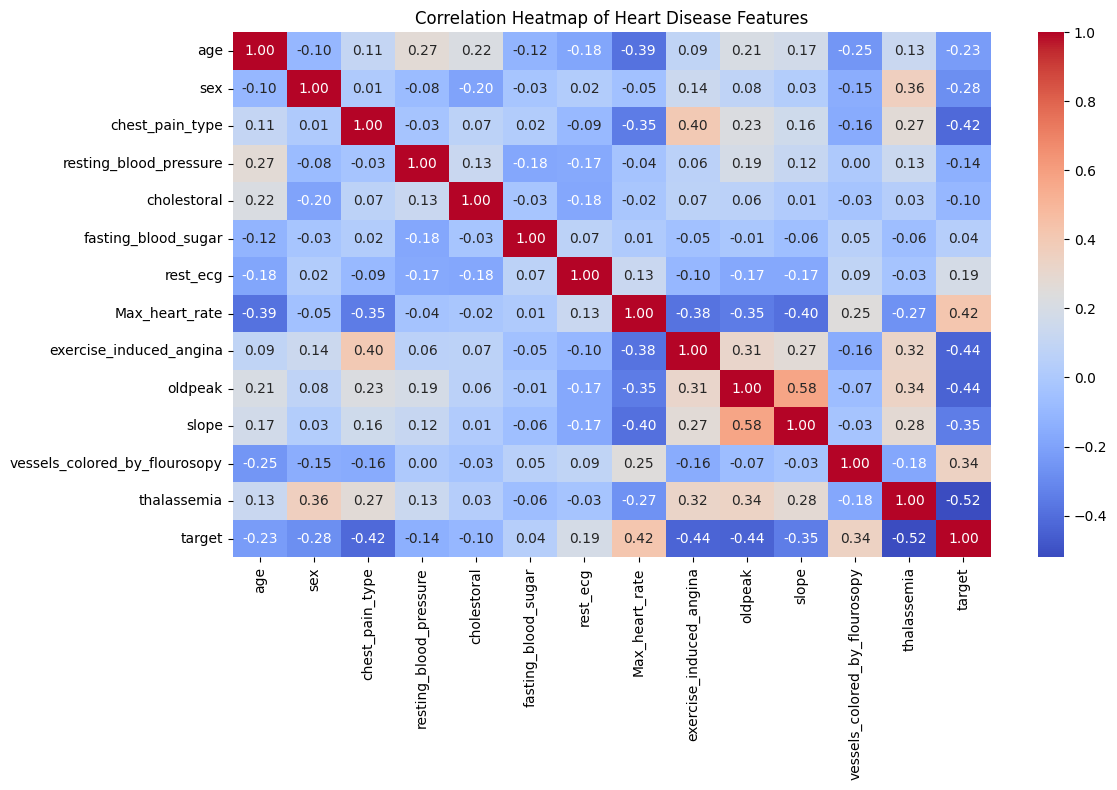

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Heart Disease Features')
plt.tight_layout()
plt.show()

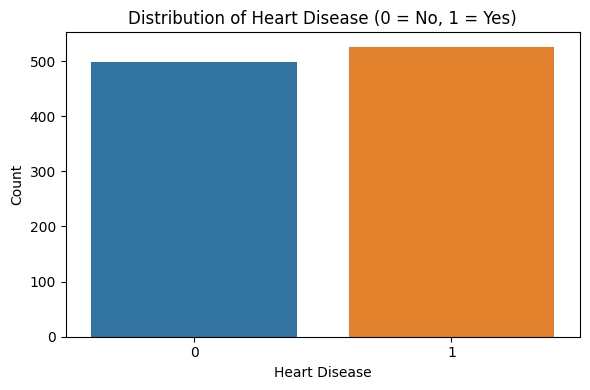

In [17]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=data)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

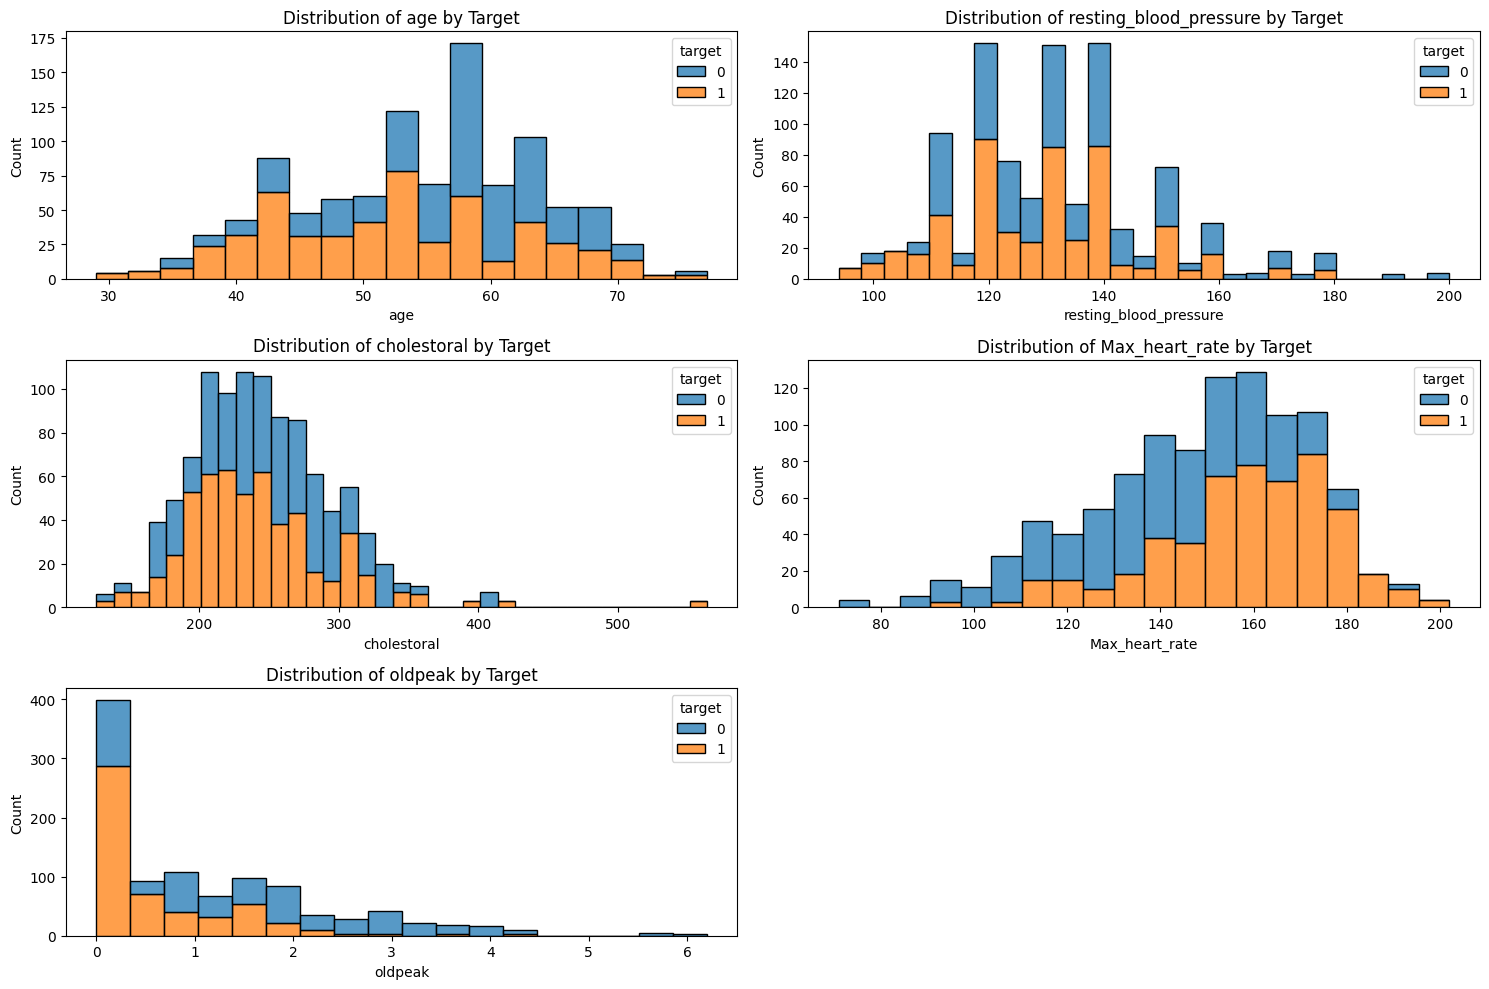

In [18]:
# Feature distributions by target
plt.figure(figsize=(15, 10))
numerical_cols = ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak']
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=data, x=col, hue='target', multiple='stack')
    plt.title(f'Distribution of {col} by Target')
plt.tight_layout()
plt.show()

In [19]:
# Prepare features and target
X = data.drop('target', axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [20]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')


Accuracy: 0.80


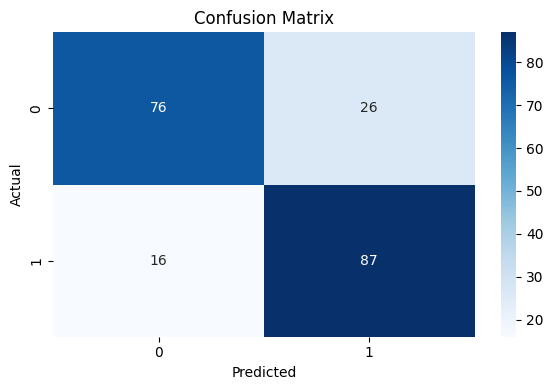

In [21]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

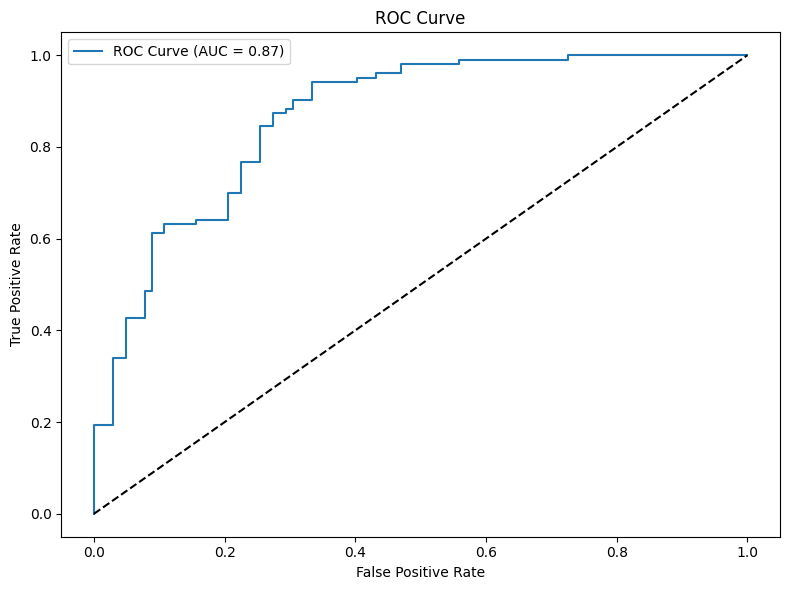

In [22]:
# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                           Feature  Importance
9                         oldpeak    0.742221
12                    thalassemia    0.716953
2                 chest_pain_type    0.712677
11  vessels_colored_by_flourosopy    0.690866
1                             sex    0.606197
7                  Max_heart_rate    0.464631
4                     cholestoral    0.458353
8         exercise_induced_angina    0.376632
3          resting_blood_pressure    0.280482
10                          slope    0.209009
6                        rest_ecg    0.148070
5             fasting_blood_sugar    0.058288
0                             age    0.023176


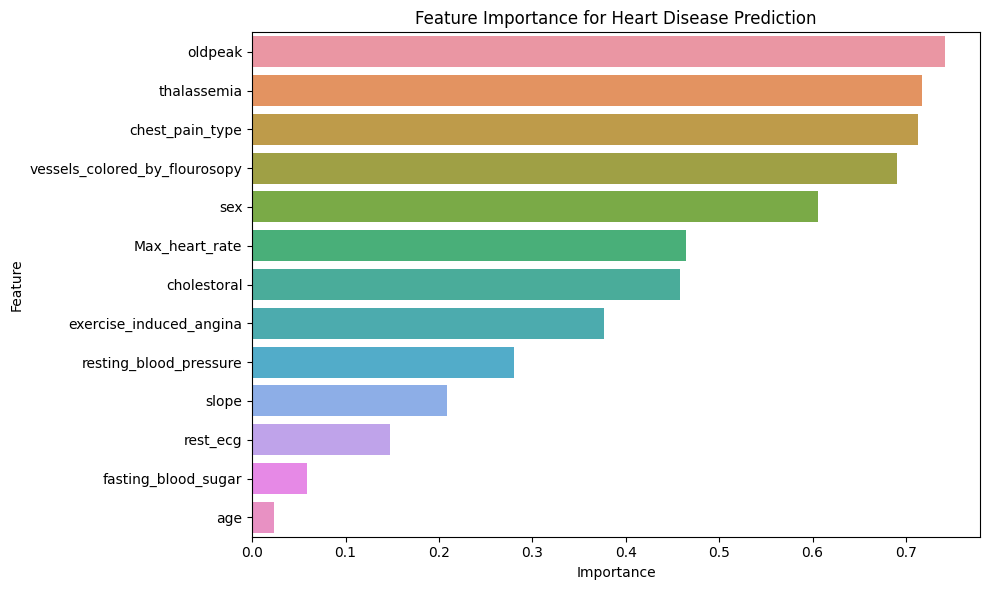

In [24]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Heart Disease Prediction')
plt.tight_layout()
plt.show()